In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

threshold = 5

In [120]:
daily_stock_data_filename = './../data/daily_data_2005-2021_filtered_nyse.pkl'

daily_stock_data = pd.read_pickle(daily_stock_data_filename)

In [121]:
min_prices = daily_stock_data.groupby('cusip')['prccd'].min()
min_prices = min_prices[min_prices < threshold]

stocks_to_keep = min_prices.index

display(min_prices)

# sort by min_prices
min_prices = min_prices.sort_values()

display(min_prices)

cusip
55645303     2.5400
60505146     2.0000
60505153     0.0005
60505567     4.3500
60505575     4.6000
              ...  
Y7388L103    0.3033
Y7542C130    1.5300
Y8564W103    1.7200
Y8565J101    1.0600
Y8565N300    0.9141
Name: prccd, Length: 1816, dtype: float64

cusip
35952V303    0.0000
35953D104    0.0001
208464123    0.0001
09746Y113    0.0001
60467R118    0.0001
              ...  
12653C108    4.9900
392709101    4.9900
060505831    4.9900
90114C107    4.9900
83304A106    4.9900
Name: prccd, Length: 1816, dtype: float64

In [122]:
# Save the stocks to keep in a text file
with open('./../data/stocks_to_keep_3.txt', 'w') as f:
    for stock in stocks_to_keep:
        str_to_write = str(stock)[:8] + "\n"
        f.write(str_to_write)

In [123]:
daily_stock_data = daily_stock_data[daily_stock_data['cusip'].isin(stocks_to_keep)]

In [124]:
display(daily_stock_data)

# replace trfd nan with 1
# replace ajexdi nan with 1
daily_stock_data['trfd'].fillna(1, inplace=True)
daily_stock_data['ajexdi'].fillna(1, inplace=True)

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic
20916,1045,2,2005/01/03,AAR,001765866,1.0000,6000000.0,23600.0,19.00,19.10,18.74,18.83,3.0,1.829594,11.0,USA,USA,4512.0
20917,1045,2,2005/01/04,AAR,001765866,1.0000,6000000.0,13700.0,18.73,19.16,18.73,19.16,3.0,1.829594,11.0,USA,USA,4512.0
20918,1045,2,2005/01/05,AAR,001765866,1.0000,6000000.0,23100.0,18.29,18.85,18.26,18.85,3.0,1.829594,11.0,USA,USA,4512.0
20919,1045,2,2005/01/06,AAR,001765866,1.0000,6000000.0,29900.0,18.30,18.45,18.18,18.45,3.0,1.829594,11.0,USA,USA,4512.0
20920,1045,2,2005/01/07,AAR,001765866,1.0000,6000000.0,19300.0,18.44,18.59,18.30,18.35,3.0,1.829594,11.0,USA,USA,4512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78032808,345699,01C,2021/12/23,ODV.,68828E809,0.3333,133203000.0,24523.0,4.14,4.18,4.08,4.15,3.0,NaN,9.0,CAN,CAN,1040.0
78032809,345699,01C,2021/12/24,ODV.,68828E809,0.3333,133203000.0,15900.0,4.16,4.18,4.14,4.15,3.0,NaN,9.0,CAN,CAN,1040.0
78032810,345699,01C,2021/12/29,ODV.,68828E809,0.3333,133203000.0,64642.0,4.08,4.15,4.06,4.15,3.0,NaN,9.0,CAN,CAN,1040.0
78032811,345699,01C,2021/12/30,ODV.,68828E809,0.3333,133203000.0,21499.0,4.02,4.15,4.02,4.08,3.0,NaN,9.0,CAN,CAN,1040.0


In [125]:
# parse date
daily_stock_data['date'] = pd.to_datetime(daily_stock_data['datadate'], format='%Y/%m/%d')

In [126]:
# Group by cusip and sort dates
daily_stock_data = daily_stock_data.sort_values(['cusip', 'date'])

display(daily_stock_data)

,gvkey,iid,datadate,tic,cusip,ajexdi,cshoc,cshtrd,prccd,prchd,prcld,prcod,prcstd,trfd,exchg,fic,loc,sic,date
624797,1949,1,2005/01/03,BRT,55645303,1.0,7652000.0,4800.0,24.25,24.49,24.20,24.34,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-03
624798,1949,1,2005/01/04,BRT,55645303,1.0,7652000.0,3300.0,24.25,24.34,24.10,24.30,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-04
624799,1949,1,2005/01/05,BRT,55645303,1.0,7652000.0,2400.0,24.30,24.33,24.26,24.26,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-05
624800,1949,1,2005/01/06,BRT,55645303,1.0,7652000.0,3800.0,24.21,24.34,24.21,24.34,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-06
624801,1949,1,2005/01/07,BRT,55645303,1.0,7652000.0,6000.0,23.70,24.20,23.65,24.20,3.0,2.376699,11.0,USA,USA,6798.0,2005-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66498808,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.92,11.39,10.90,11.39,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-27
66498809,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.94,11.25,10.90,11.02,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-28
66498810,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.66,10.93,10.50,10.86,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-29
66498811,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.69,10.95,10.64,10.74,3.0,2.645633,11.0,MHL,CAN,4412.0,2021-12-30


In [127]:
def first_time_it_hits_price(stock_data):
    # import timedelta
    from datetime import timedelta
    # print(stock_data)
    first_time = stock_data[stock_data['prccd'] < threshold].iloc[0]
    # Make a series with zeroes before the first time it hits the price and ones after
    stock_data['first_time_below_thresh'] = stock_data['date'].apply(lambda x: 1 if x >= first_time['date'] - timedelta(days = 30) else 0)
    return stock_data


daily_stock_data = daily_stock_data.groupby('cusip').apply(first_time_it_hits_price)

daily_stock_data = daily_stock_data[daily_stock_data['first_time_below_thresh'] == 1]

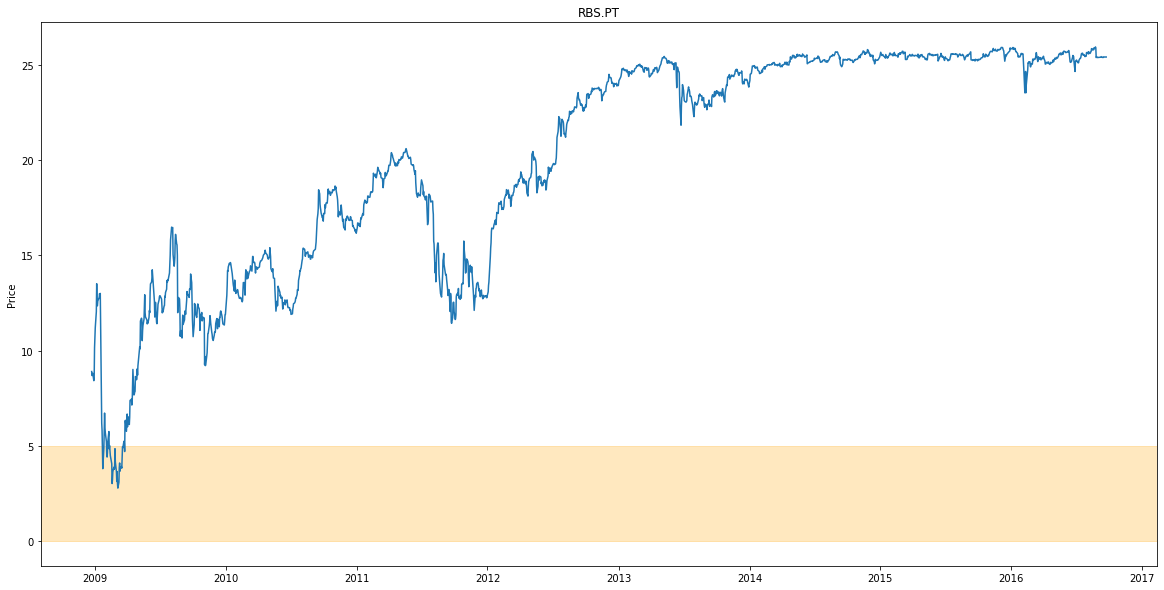

In [128]:
# All stocks in daily stock data
all_stocks = daily_stock_data['cusip'].unique()

# get a random one and plot it's price
random_stock = np.random.choice(all_stocks)
random_stock_data = daily_stock_data[daily_stock_data['cusip'] == random_stock].copy()
# ajexdi_change = ajexdi_curr - ajexdi_prev
random_stock_data['ajexdi_change'] = random_stock_data['ajexdi'] - random_stock_data['ajexdi'].shift(1)




fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(random_stock_data['date'], random_stock_data['prccd'])

splits = random_stock_data[random_stock_data['ajexdi_change'] != 0]

if(len(splits) > 0):
    # Big markers
    colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
    ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
# Draw horizontal span at 1 alpha = 0.25 in orange
ax.axhspan(0, 5, alpha=0.25, color='orange')

# Add ticker to title
ax.set_title(random_stock_data.iloc[0]['tic'])
# Add y axis label
ax.set_ylabel('Price')
plt.show()

In [129]:
len(all_stocks)

1816

In [130]:
institutional_holdings_filename = './../data/institutional_data_5_thresh.csv'
institutional_holdings = pd.read_csv(institutional_holdings_filename)


display(institutional_holdings)

C:\Users\amrit\AppData\Local\Temp\ipykernel_59488\90189037.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  institutional_holdings = pd.read_csv(institutional_holdings_filename)


,fdate,cusip,mgrno,type,shares,sole,shared,no
0,2005/09/30,00081T10,220,5,7700,7700,0,0
1,2005/09/30,00081T10,650,5,20000,20000,0,0
2,2005/09/30,00081T10,800,5,47,0,0,47
3,2005/09/30,00081T10,1025,5,235,0,0,235
4,2005/09/30,00081T10,1380,1,14009,0,0,14009
...,...,...,...,...,...,...,...,...
6323720,2021/12/31,Y8565N30,75100,5,410247,331040,0,79207
6323721,2021/12/31,Y8565N30,76760,5,335692,335692,0,0
6323722,2021/12/31,Y8565N30,81540,1,308698,282600,0,26098
6323723,2021/12/31,Y8565N30,84900,5,10775,10775,0,0


In [131]:
# groupby cusip and fdate and type and get the sum of shares
institutional_holdings_agg = institutional_holdings.groupby(['cusip', 'fdate', 'type'])['shares'].sum().reset_index()

institutional_holdings_agg

# Just type == 5
institutional_holdings_agg = institutional_holdings_agg[institutional_holdings_agg['type'] == 5]

# Make fdate a datetime
institutional_holdings_agg['fdate'] = pd.to_datetime(institutional_holdings_agg['fdate'], format='%Y/%m/%d')

In [132]:
display(institutional_holdings_agg)

# count the number of unique cusips
len(institutional_holdings_agg['cusip'].unique())

,cusip,fdate,type,shares
4,6050510,2007-09-30,5,1408634026
9,6050510,2007-12-31,5,1602243439
14,6050510,2008-03-31,5,1645029389
19,6050510,2008-06-30,5,1524781388
24,6050510,2008-09-30,5,1338813364
...,...,...,...,...
190232,Y8565N30,2020-12-31,5,6285495
190237,Y8565N30,2021-03-31,5,6789428
190242,Y8565N30,2021-06-30,5,7484166
190247,Y8565N30,2021-09-30,5,6453160


1301

In [133]:
daily_stock_data['cusip_brief'] = daily_stock_data['cusip'].apply(lambda x: str(x)[:8])

In [134]:
# make institution holdings agg daily instead of quarterly by resampling
institutional_holdings_agg_daily = institutional_holdings_agg.set_index('fdate').groupby('cusip')['shares'].resample('D').ffill().reset_index()

display(institutional_holdings_agg_daily)

# count the number of cusip
institutional_holdings_agg_daily['cusip'].nunique()

,cusip,fdate,shares
0,6050510,2007-09-30,1408634026
1,6050510,2007-10-01,1408634026
2,6050510,2007-10-02,1408634026
3,6050510,2007-10-03,1408634026
4,6050510,2007-10-04,1408634026
...,...,...,...
4197399,Y8565N30,2021-12-27,6453160
4197400,Y8565N30,2021-12-28,6453160
4197401,Y8565N30,2021-12-29,6453160
4197402,Y8565N30,2021-12-30,6453160


1301

In [135]:
# Merge with daily stock data
daily_stock_data_merged = daily_stock_data.merge(institutional_holdings_agg_daily, how='left', left_on=['cusip_brief', 'date'], right_on=['cusip', 'fdate'])

In [136]:
len(daily_stock_data_merged)

2774429

In [137]:
# drop na cusip_y
daily_stock_data_merged = daily_stock_data_merged.dropna(subset=['cusip_y'])

# count the number of cusip
daily_stock_data_merged['cusip_y'].nunique()

1278

In [138]:


display(daily_stock_data_merged.dtypes)
# Count the number of missing values
display(daily_stock_data_merged.isna().sum())

daily_stock_data_merged

gvkey                               int64
iid                                object
datadate                           object
tic                                object
cusip_x                            object
ajexdi                            float64
cshoc                             float64
cshtrd                            float64
prccd                             float64
prchd                             float64
prcld                             float64
prcod                             float64
prcstd                            float64
trfd                              float64
exchg                             float64
fic                                object
loc                                object
sic                               float64
date                       datetime64[ns]
first_time_below_thresh             int64
cusip_brief                        object
cusip_y                            object
fdate                      datetime64[ns]
shares                            

gvkey                          0
iid                            0
datadate                       0
tic                            0
cusip_x                        0
ajexdi                         0
cshoc                       2697
cshtrd                        63
prccd                         52
prchd                        119
prcld                         52
prcod                      14579
prcstd                        52
trfd                           0
exchg                          0
fic                         2050
loc                         1320
sic                          251
date                           0
first_time_below_thresh        0
cusip_brief                    0
cusip_y                        0
fdate                          0
shares                         0
dtype: int64

,gvkey,iid,datadate,tic,cusip_x,ajexdi,cshoc,cshtrd,prccd,prchd,...,exchg,fic,loc,sic,date,first_time_below_thresh,cusip_brief,cusip_y,fdate,shares
23213,3007,1,2008/10/21,EAT,109641100,1.0,101387000.0,1747417.0,9.39,10.18,...,11.0,USA,USA,5812.0,2008-10-21,1,10964110,10964110,2008-10-21,84696123.0
23214,3007,1,2008/10/22,EAT,109641100,1.0,101387000.0,1681293.0,9.03,9.32,...,11.0,USA,USA,5812.0,2008-10-22,1,10964110,10964110,2008-10-22,84696123.0
23215,3007,1,2008/10/23,EAT,109641100,1.0,101387000.0,2111594.0,8.68,9.21,...,11.0,USA,USA,5812.0,2008-10-23,1,10964110,10964110,2008-10-23,84696123.0
23216,3007,1,2008/10/24,EAT,109641100,1.0,101387000.0,1181439.0,8.05,8.30,...,11.0,USA,USA,5812.0,2008-10-24,1,10964110,10964110,2008-10-24,84696123.0
23217,3007,1,2008/10/27,EAT,109641100,1.0,101387000.0,1004047.0,8.01,8.44,...,11.0,USA,USA,5812.0,2008-10-27,1,10964110,10964110,2008-10-27,84696123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774424,179087,01,2021/12/27,TNK,Y8565N300,1.0,29200000.0,234660.0,10.92,11.39,...,11.0,MHL,CAN,4412.0,2021-12-27,1,Y8565N30,Y8565N30,2021-12-27,6453160.0
2774425,179087,01,2021/12/28,TNK,Y8565N300,1.0,29200000.0,151377.0,10.94,11.25,...,11.0,MHL,CAN,4412.0,2021-12-28,1,Y8565N30,Y8565N30,2021-12-28,6453160.0
2774426,179087,01,2021/12/29,TNK,Y8565N300,1.0,29200000.0,285404.0,10.66,10.93,...,11.0,MHL,CAN,4412.0,2021-12-29,1,Y8565N30,Y8565N30,2021-12-29,6453160.0
2774427,179087,01,2021/12/30,TNK,Y8565N300,1.0,29200000.0,225404.0,10.69,10.95,...,11.0,MHL,CAN,4412.0,2021-12-30,1,Y8565N30,Y8565N30,2021-12-30,6453160.0


In [139]:
# ownership percentage. shares / cshoc

daily_stock_data_merged['instituional_ownership_perc'] = daily_stock_data_merged['shares'] / daily_stock_data_merged['cshoc']



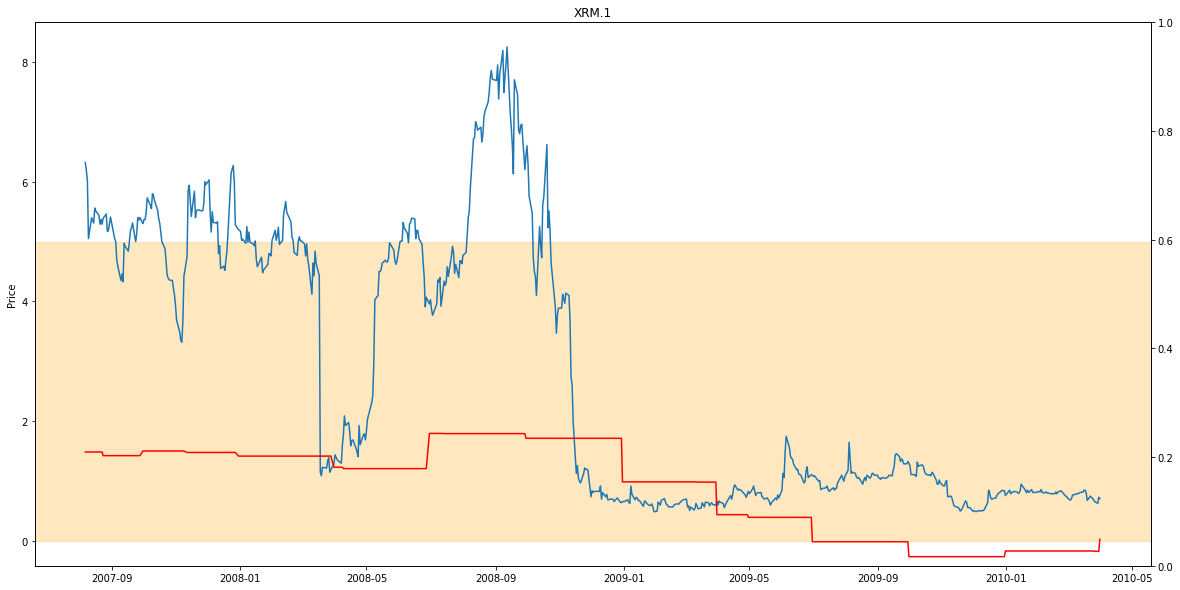

In [140]:
# All stocks in daily stock data
all_stocks = daily_stock_data_merged['cusip_x'].unique()

# get a random one and plot it's price
random_stock = np.random.choice(all_stocks)
random_stock_data = daily_stock_data_merged[daily_stock_data_merged['cusip_x'] == random_stock].copy()
# ajexdi_change = ajexdi_curr - ajexdi_prev
random_stock_data['ajexdi_change'] = random_stock_data['ajexdi'] - random_stock_data['ajexdi'].shift(1)




fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(random_stock_data['date'], random_stock_data['prccd'])

splits = random_stock_data[random_stock_data['ajexdi_change'] != 0]

if(len(splits) > 0):
    # Big markers
    colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
    ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
# Draw horizontal span at 1 alpha = 0.25 in orange
ax.axhspan(0, 5, alpha=0.25, color='orange')

# Plot institutional ownership with twin y 
ax2 = ax.twinx()
ax2.plot(random_stock_data['date'], random_stock_data['instituional_ownership_perc'], color='red')
ax2.set_ylim(0, 1)
# Add ticker to title
ax.set_title(random_stock_data.iloc[0]['tic'])
# Add y axis label
ax.set_ylabel('Price')
plt.show()

For stock VHC with ownership percentage 0.19248310558831394, the returns are [{'cusip': '92823T108', 'tic': 'VHC', 'ownershipPerc': 0.0003341833810888252, 'startDate': Timestamp('2008-05-29 00:00:00'), 'returns': {'30': 0.081395348837209, '90': -0.3837209302325584, '180': -0.46046511627907005}}, {'cusip': '92823T108', 'tic': 'VHC', 'ownershipPerc': 0.019455117929929013, 'startDate': Timestamp('2010-03-31 00:00:00'), 'returns': {'30': 0.11199127906976836, '90': 0.3406250081061064, '180': 1.9944380433159927}}, {'cusip': '92823T108', 'tic': 'VHC', 'ownershipPerc': 0.1454441061837079, 'startDate': Timestamp('2014-09-23 00:00:00'), 'returns': {'30': 2.302955902324308, '90': 2.6659180893929126, '180': 2.6417206102550055}}, {'cusip': '92823T108', 'tic': 'VHC', 'ownershipPerc': 0.13587115528522364, 'startDate': Timestamp('2015-05-26 00:00:00'), 'returns': {'30': 2.020141791235576, '90': 1.193807596539159, '180': 0.9159253009775321}}, {'cusip': '92823T108', 'tic': 'VHC', 'ownershipPerc': 0.1120

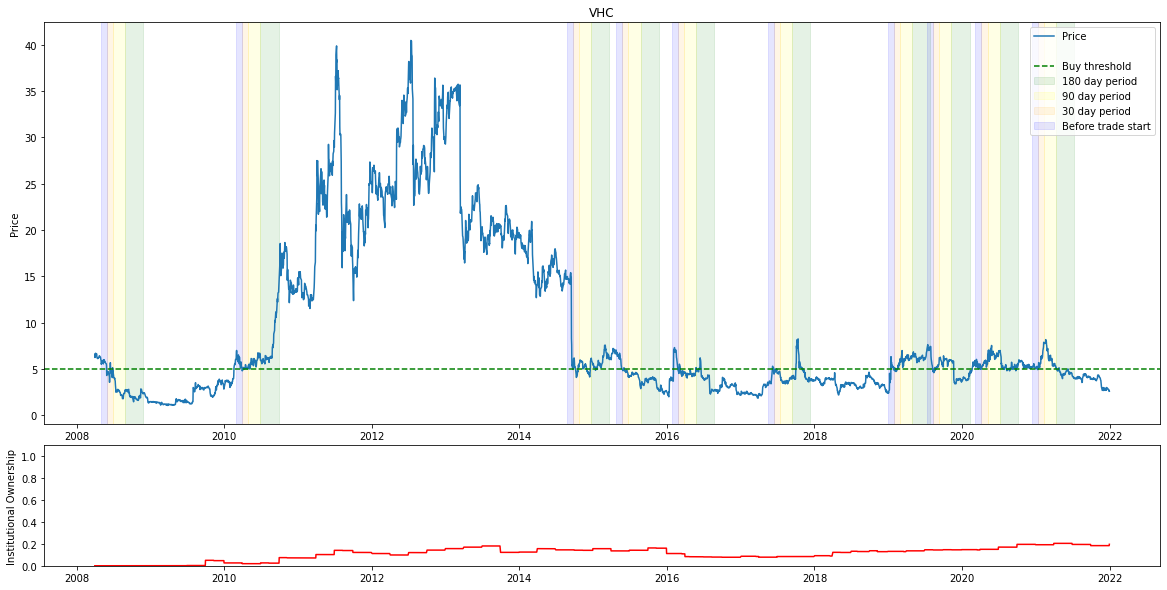

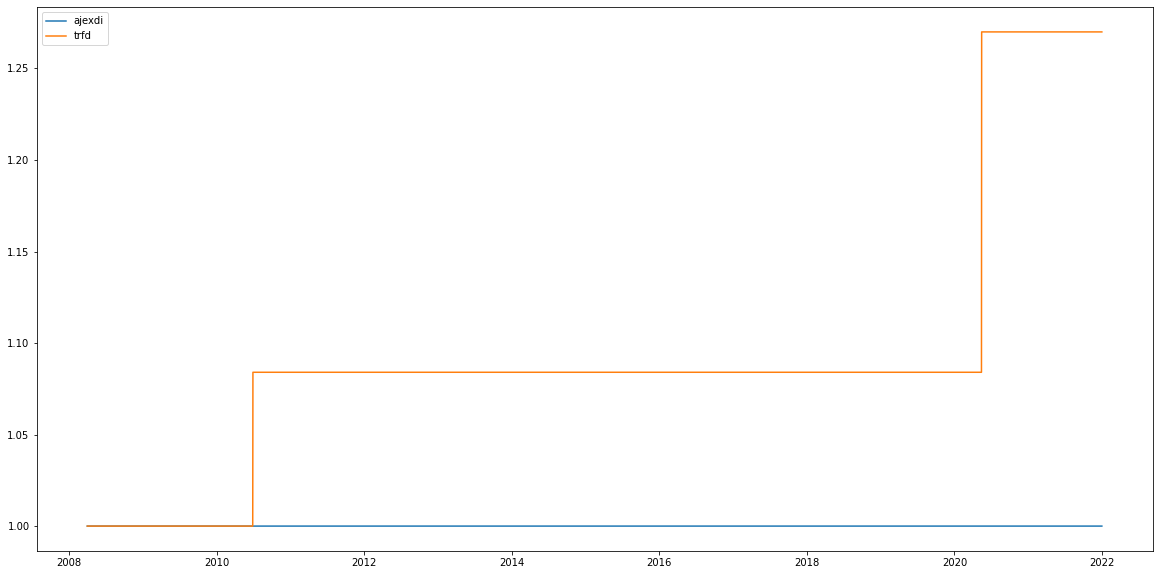

,cusip,tic,ownershipPerc,startDate,30,90,180
0,109641100,EAT,0.831659,2008-11-20,1.161066,1.355969,2.796705
1,171871502,CBB,0.715881,2019-06-25,-0.269777,0.180527,1.119675
2,230215105,CULP,0.467143,2005-04-25,-0.200000,-0.090000,-0.004000
3,230215105,CULP,0.373357,2005-11-15,-0.008024,-0.054303,-0.034182
4,230215105,CULP,0.433434,2006-06-28,0.029167,-0.015078,-0.038162
...,...,...,...,...,...,...,...
2447,Y8564W103,TK,0.422057,2016-01-20,0.552985,1.255720,0.484446
2448,Y8564W103,TK,0.156979,2018-11-19,0.240210,0.230650,0.372400
2449,Y8564W103,TK,0.128710,2019-11-13,0.388108,-0.085356,-0.112257
2450,Y8565J101,TOO,0.466086,2015-12-17,-0.156915,0.583638,0.213167


In [152]:
# Final data export to pkl
daily_stock_data_merged.to_pickle('./../data/daily_stock_data_merged.pkl')

import datetime
# import make axes locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable

i = 0
plot = False

last_date = daily_stock_data_merged['date'].max()

allTrades = []

cusips_of_interest = ['92823T108']

# Iterate over every stock by cusip
for index, group in daily_stock_data_merged.groupby('cusip_x'):
    i += 1

    # If state is 0, then look for a buy signal (price <= threshold)
    #   If found, set state to 1 and set tradeStartDate to the date of the buy signal, , record the ownership percentage.
    # If state is 1, then look for whether it's been 30 days, 90 days, or 180 days since the tradeStartDate
    #   If it's been 30 days, then record cumulative return.
    #   If it's been 90 days, then record cumulative return.
    #   If it's been 180 days, then record cumulative return and set state to 0.

    returns = []

    returns_agg = {
        '30': -1,
        '90': -1,
        '180': -1
    }
    trades = []

    ownershipPerc = 0
    state = 6
    prevAdjPrice = np.NaN
    for index, day in group.iterrows():
        if(state == 6 and day['prccd'] > threshold):
            state = 0
        elif(state == 0 and day['prccd'] <= threshold):
            state = 1
            tradeStartDate = day['date']
            prevAdjPrice = day['prccd'] / day['ajexdi'] * day['trfd']
            ownershipPerc = day['instituional_ownership_perc']
            returns = []

        elif(state != 0):
            ret = 1 + (day['prccd'] / day['ajexdi'] * day['trfd'] - prevAdjPrice) / prevAdjPrice
            prevAdjPrice = day['prccd'] / day['ajexdi'] * day['trfd']
            returns.append(ret)
            if(day['date'] - tradeStartDate >= pd.Timedelta('30 days') and state == 1):
                returns_agg['30'] = np.prod(returns) - 1
                state = 2

            elif(day['date'] - tradeStartDate >= pd.Timedelta('90 days') and state == 2):
                returns_agg['90'] = np.prod(returns) - 1
                state = 3

            elif(day['date'] - tradeStartDate >= pd.Timedelta('180 days') and state == 3):
                returns_agg['180'] = np.prod(returns) - 1
                state = 6

                trades.append({
                    'cusip' : group['cusip_x'].iloc[0],
                    'tic' : group['tic'].iloc[0],
                    'ownershipPerc' : ownershipPerc,
                    'startDate' : tradeStartDate,
                    'returns' : returns_agg.copy()
                })

                returns_agg = {
                    '30' : -1,
                    '90' : -1,
                    '180' : -1
                }
            elif(day['date'] - datetime.timedelta(days = 4) >= last_date):
                state = 5
                break

    # Account for delistings
    if(state != 0 and state != 5 and state != 6):
        trades.append({
            'cusip' : group['cusip_x'].iloc[0],
            'tic' : group['tic'].iloc[0],
            'ownershipPerc' : ownershipPerc,
            'startDate' : tradeStartDate,
            'returns' : returns_agg.copy()
        })

    if(plot or str(group['cusip_x'].iloc[0]) in cusips_of_interest):
        print("For stock " + group['tic'].iloc[0] + " with ownership percentage " + str(ownershipPerc) + ", the returns are " + str(trades) + ".")
        # Plot the price
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(group['date'], group['prccd'])

        group = group.copy()
        group['ajexdi_change'] = group['ajexdi'] - group['ajexdi'].shift(1)
        splits = group[group['ajexdi_change'] != 0]

        if(len(splits) > 0):
            # Big markers
            colors = ['red' if x > 0 else 'green' for x in splits.iloc[1:]['ajexdi_change']]
            ax.scatter(splits.iloc[1:]['date'], splits.iloc[1:]['prccd'], marker='x', s=100, c=colors)
        # Draw horizontal dashed line at threshold
        ax.axhline(y=threshold, linestyle='--', color='green')

        # Plot institutional ownership with twin y
        # height of ax2 is 0.2 of ax
        divider = make_axes_locatable(ax)
        ax2 = divider.append_axes("bottom", size="30%", pad=0.3)

        # set ax2 height

        ax2.plot(group['date'], group['instituional_ownership_perc'], color='red')
        ax2.set_ylim(0, 1.1)
        ax2.set_ylabel('Institutional Ownership')
        
        # Add ticker to title
        ax.set_title(group.iloc[0]['tic'])
        # Add y axis label
        ax.set_ylabel('Price')

        for trade in trades:
            ax.axvspan(trade['startDate'] + pd.Timedelta('90 days'), trade['startDate'] + pd.Timedelta('180 days'), alpha=0.1, color='green')
            ax.axvspan(trade['startDate'] + pd.Timedelta('30 days'), trade['startDate'] + pd.Timedelta('90 days'), alpha=0.1, color='yellow')
            ax.axvspan(trade['startDate'] , trade['startDate'] + pd.Timedelta('30 days'), alpha=0.1, color='orange')
            # pre trade period
            ax.axvspan(trade['startDate'] - pd.Timedelta('30 days'), trade['startDate'], alpha=0.1, color='blue')

        # add legend to ax
        ax.legend(['Price', '', 'Buy threshold', '180 day period', '90 day period', '30 day period', 'Before trade start'])

        print('Cusip: ' + str(group['cusip_x'].iloc[0]))

        # plot axjedi and trfd
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(group['date'], group['ajexdi'], label='ajexdi')
        ax.plot(group['date'], group['trfd'], label='trfd')

        ax.legend()

        plt.show()
    

    allTrades += trades

    # if(i >= 10):
    #     break



# Make a df out of allTrades with columns startDate, ownershipPerc, 30, 90, 180, cusip, tic
allTradesDf = pd.DataFrame(allTrades)
# Unwrap the returns column with dict keys as columns and dict values as values
allTradesDf = pd.concat([allTradesDf.drop(['returns'], axis=1), allTradesDf['returns'].apply(pd.Series)], axis=1)

display(allTradesDf)


0-20%     1048
40-60%     521
20-40%     497
60-80%     299
80+         50
Name: ownershipPercBin, dtype: int64

,cusip,tic,ownershipPerc,startDate,30,90,180,ownershipPercBin
0,109641100,EAT,0.831659,2008-11-20,1.161066,1.355969,2.796705,80+
1,171871502,CBB,0.715881,2019-06-25,-0.269777,0.180527,1.119675,60-80%
2,230215105,CULP,0.467143,2005-04-25,-0.200000,-0.090000,-0.004000,40-60%
3,230215105,CULP,0.373357,2005-11-15,-0.008024,-0.054303,-0.034182,20-40%
4,230215105,CULP,0.433434,2006-06-28,0.029167,-0.015078,-0.038162,40-60%
...,...,...,...,...,...,...,...,...
2447,Y8564W103,TK,0.422057,2016-01-20,0.552985,1.255720,0.484446,40-60%
2448,Y8564W103,TK,0.156979,2018-11-19,0.240210,0.230650,0.372400,0-20%
2449,Y8564W103,TK,0.128710,2019-11-13,0.388108,-0.085356,-0.112257,0-20%
2450,Y8565J101,TOO,0.466086,2015-12-17,-0.156915,0.583638,0.213167,40-60%


,mean,median
ownershipPercBin,,
0-20%,0.499773,0.195888
20-40%,0.447977,0.166333
40-60%,0.487483,0.229311
60-80%,0.478849,0.184303
80+,0.155403,0.041842


,cusip,tic,ownershipPerc,startDate,30,90,180,ownershipPercBin
2211,92823T108,VHC,0.192483,2021-01-11,8.674589,5.203553,3.886529,0-20%
428,152006102,CG.,0.003331,2019-01-03,7.806519,7.727581,11.271655,0-20%
1930,83066R107,SKH,0.040636,2014-04-10,7.806518,9.521645,9.241288,0-20%
426,152006102,CG.,0.002936,2018-01-03,6.923989,7.883043,7.647210,0-20%
427,152006102,CG.,0.002154,2018-07-06,6.891458,6.293887,6.558224,0-20%
424,152006102,CG.,0.003364,2016-08-31,6.799876,6.585200,5.669251,0-20%
425,152006102,CG.,0.006824,2017-02-28,6.741832,10.000953,6.798211,0-20%
2330,98585L100,YRD,0.025022,2019-12-02,6.643271,3.974192,3.646624,0-20%
1929,83066R107,SKH,0.088056,2013-08-06,6.551705,6.250271,6.075757,0-20%
422,152006102,CG.,0.003120,2015-07-21,6.331539,5.800488,7.585971,0-20%


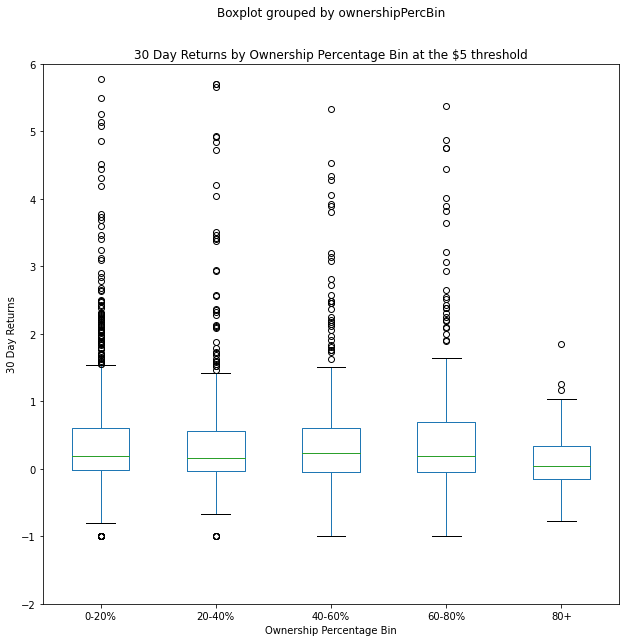

In [150]:
# For the 30 day returns, calculate box plots for returns by ownership percentage bins


# Get the ownership percentage bins using pd.cut
# allTradesDf['ownershipPercBin'] = pd.qcut(allTradesDf['ownershipPerc'], 5, labels=['L', '2', '3', '4', 'H'])

# Bin 0-20%, 20-40%, 40-60%, 60-80%, 80+
allTradesDf['ownershipPercBin'] = pd.cut(allTradesDf['ownershipPerc'], [0, 0.2, 0.4, 0.6, 0.8, 1], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80+'])
# Number in each bin
display(allTradesDf['ownershipPercBin'].value_counts())

# Drop nan values
allTradesDfDroppedNan = allTradesDf.dropna()
# Drop rows where 30 day return is greater than 10
allTradesDfDroppedNan = allTradesDfDroppedNan[allTradesDfDroppedNan['30'] < 10]
display(allTradesDfDroppedNan)
# Make a box plot of the 30 day returns by ownership percentage bin
fig, ax = plt.subplots(figsize=(10, 10))

allTradesDfDroppedNan.boxplot(column='30', by='ownershipPercBin', figsize=(20, 10), ax=ax)

# set y axis lim to 0 to 1
ax.set_ylim(-2, 6)
# Make beautiful
ax.set_title('30 Day Returns by Ownership Percentage Bin at the ${} threshold'.format(threshold))
ax.set_xlabel('Ownership Percentage Bin')
ax.set_ylabel('30 Day Returns')

# Remove vertical grid lines
ax.xaxis.grid(False)
# Remove horizontal grid lines
ax.yaxis.grid(False)


# Print the mean and median for each bin for the 30 day returns as a table
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['30'].agg(['mean', 'median']))

allTradesDfDroppedNan[allTradesDfDroppedNan['ownershipPercBin'] == '0-20%'].sort_values(by='30', ascending=False).head(10)


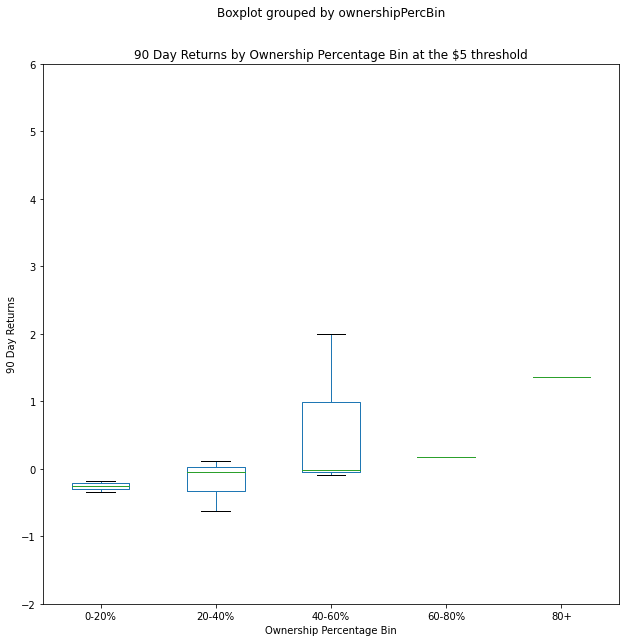

,mean,median
ownershipPercBin,,
0-20%,-0.259720,-0.259720
20-40%,-0.186986,-0.054303
40-60%,0.630228,-0.015078
60-80%,0.180527,0.180527
80+,1.355969,1.355969


ownershipPercBin
0-20%     2
20-40%    3
40-60%    3
60-80%    1
80+       1
Name: 90, dtype: int64

In [143]:
# Do the same for 90 day returns
fig, ax = plt.subplots(figsize=(10, 10))

allTradesDfDroppedNan.boxplot(column='90', by='ownershipPercBin', figsize=(20, 10), ax=ax)

# set y axis lim to 0 to 1
ax.set_ylim(-2, 6)

# Make beautiful
ax.set_title('90 Day Returns by Ownership Percentage Bin at the ${} threshold'.format(threshold))
ax.set_xlabel('Ownership Percentage Bin')
ax.set_ylabel('90 Day Returns')

# Remove vertical grid lines
ax.xaxis.grid(False)
# Remove horizontal grid lines
ax.yaxis.grid(False)

plt.show()

# Print the mean and median for each bin for the 90 day returns as a table
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['90'].agg(['mean', 'median']))

# Number of trades in each bin
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['90'].count())

In [144]:
# 90 - day equal width bins


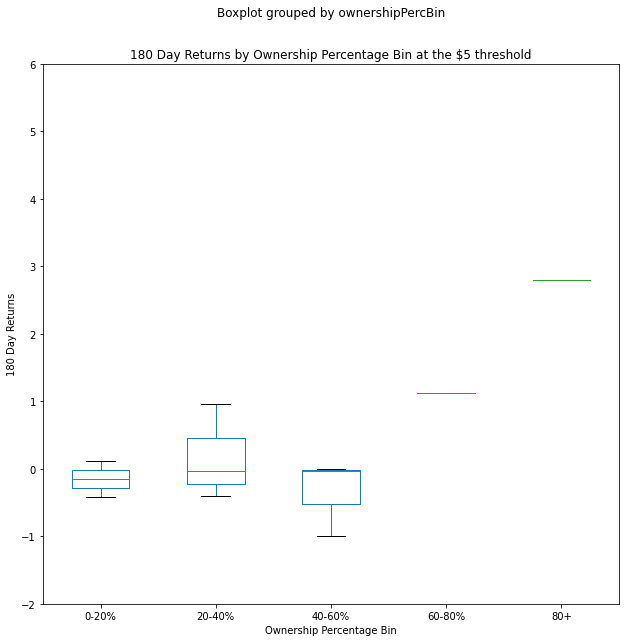

,mean,median
ownershipPercBin,,
0-20%,-0.154515,-0.154515
20-40%,0.171655,-0.034182
40-60%,-0.347387,-0.038162
60-80%,1.119675,1.119675
80+,2.796705,2.796705


ownershipPercBin
0-20%     2
20-40%    3
40-60%    3
60-80%    1
80+       1
Name: 180, dtype: int64

In [145]:
# Do the same for 180 day returns
fig, ax = plt.subplots(figsize=(10, 10))

allTradesDfDroppedNan.boxplot(column='180', by='ownershipPercBin', figsize=(20, 10), ax=ax)

# set y axis lim to 0 to 1
ax.set_ylim(-2, 6)

# Make beautiful
ax.set_title('180 Day Returns by Ownership Percentage Bin at the ${} threshold'.format(threshold))
ax.set_xlabel('Ownership Percentage Bin')
ax.set_ylabel('180 Day Returns')

# Remove vertical grid lines
ax.xaxis.grid(False)
# Remove horizontal grid lines
ax.yaxis.grid(False)

plt.show()

# Print the mean and median for each bin for the 180 day returns as a table
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['180'].agg(['mean', 'median']))

# Number of trades in each bin
display(allTradesDfDroppedNan.groupby('ownershipPercBin')['180'].count())
